In [1]:
#Importing packets for calculations and plotting the graph
import numpy as np
import matplotlib.pyplot as plt
#importng packets for animating the plotted graphs
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
#IImporting packet to display the animation
from IPython.display import Image

# Task 1


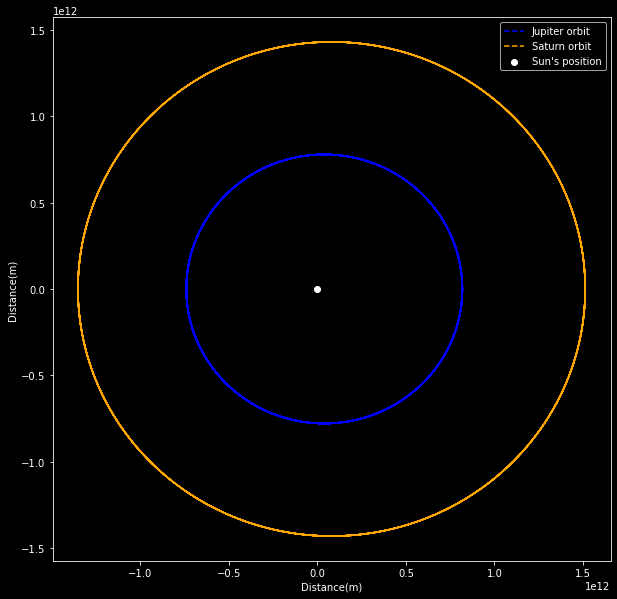

In [2]:
#Constants               #Units
AU=1.495978707*10**11    #m
S2D=60*60*24             #seconds to 1 day
G=6.67408*10**-11*S2D**2 #m^3kg^-1day^-2

#Sun, jupiter and Saturn mass, position and velocity values                                 #Units
Sun={'Msun':1.989*10**30,'Xsun':0,'Ysun':0,'Vx_sun':0,'Vy_sun':0}                           #kg,kg,m,m,m/day,m/day
Jupiter={'Mjup':1.89819*10**27,'Xjup':-4.9501*AU,'Yjup':0,'Vx_jup':0, 'Vy_jup':-13720*S2D}  #kg,kg,m,m,m/day,m/day
Saturn={'Msat':5.6834*10**26,'Xsat':-9.0412*AU,'Ysat':0,'Vx_sat':0,'Vy_sat':-10180*S2D}     #kg,kg,m,m,m/day,m/day
  
Tfinal= 365.25*250              #250 years in days
T=np.arange(1,Tfinal,1)         #array from 1 to 250 years in days per day

#Jupiter's Initial Conditions:
X1=Jupiter['Xjup']              #Set initial X-Position value for Jupiter  (m)
Y1=Jupiter['Yjup']              #Set initial Y-Position value for Jupiter  (m)
Vxj=Jupiter['Vx_jup']           #Set initial X-Velocity for Jupiter        (m/day)
Vyj=Jupiter['Vy_jup']           #Set initial Y-Velocity for Jupiter        (m/day)
rjx=Sun['Xsun']-Jupiter['Xjup'] #Set initial distance between X-Coordinates of Jupiter and the Sun  (m)
rjy=Sun['Ysun']-Jupiter['Yjup'] #Set initial distance between Y-Coordinates of Jupiter and the Sun  (m)

#Saturn's Initial Conditions:
X2=Saturn['Xsat']               #Set initial X-Position for Saturn         (m)
Y2=Saturn['Ysat']               #Set initial Y-Position for Saturn         (m)
Vxs=Saturn['Vx_sat']            #Set initial X-velocity for Saturn         (m/day)
Vys=Saturn['Vy_sat']            #Set initial Y-velocity for Saturn         (m/day)
rsx=Sun['Xsun']-Saturn['Xsat']  #Set initial distance between x-coordinate of Saturn and the Sun    (m)
rsy=Sun['Ysun']-Saturn['Ysat']  #Set initial distance between y-coordinate of Saturn and the Sun    (m)

Fj=Fs=G*(Sun['Msun'])           #Attraction force on Jupiter & Saturn from the Sun   (#m^3day^-2)

#Initial List Values:
XJupiter=[Jupiter['Xjup']]      #Set initial X-Coordinate for Jupiter
YJupiter=[Jupiter['Yjup']]      #Set initial Y-Coordinate for Jupiter
XSaturn=[Saturn['Xsat']]        #Set initial X-Coordinate for Saturn           
YSaturn=[Saturn['Ysat']]        #Set initial Y-Coordinate for Saturn

#For loop to calculate X and Y Coordinates for Jupiter & Saturn
for i in T:
    Rj=(rjx**2+rjy**2)**0.5     #Distance between corresponding x and y values of the Sun to Jupiter
    Rs=(rsx**2+rsy**2)**0.5     #Distance between corresponding x and y values of the Sun to Saturn
    
    #Jupiter
    ajx=Fj*rjx/(Rj**3)          #Acceleration for Jupiter's corresponding X position   (m/day^2)
    ajy=Fj*rjy/(Rj**3)          #Acceleration for Jupiter's corresponding Y position   (m/day^2)
    Vxj=Vxj+ajx                 #Velocity for Jupiter's corresponding X position       (m/day)
    Vyj=Vyj+ajy                 #Velocity for Jupiter's corresponding Y position       (m/day)
    
    X1=X1+Vxj                   #X Coordinate for Jupiter                              (m)
    XJupiter.append(X1)         #Appends the X Coordinate of Jupiter to a list
    Y1=Y1+Vyj                   #Y Coordinate for Jupiter                              (m)
    YJupiter.append(Y1)         #Appends the Y Coordinate of Jupiter to a list
    
    rjx=Sun['Xsun']-X1          #Distance between the Sun's and Jupiter's corresponding X coordinates
    rjy=Sun['Ysun']-Y1          #Distance between the Sun's and Jupiter's corresponding Y coordinates
    
    #Saturn
    asx=Fs*rsx/(Rs**3)          #Acceleration for Saturn's corresponding X position    (m/day^2)
    asy=Fs*rsy/(Rs**3)          #Acceleration for Saturn's corresponding Y position    (m/day^2)
    Vxs=Vxs+asx                 #Velocity for Saturn's corresponding X position        (m/day) 
    Vys=Vys+asy                 #Velocity for Saturn's corresponding Y position        (m/day)
   
    X2=X2+Vxs                   #X-coordinate for Saturn                               (m)
    XSaturn.append(X2)          #Appends the X Coordinate of Jupiter to a list
    Y2=Y2+Vys                   #Y-coordinate for Saturn                               (m)
    YSaturn.append(Y2)          #Appends the Y Coordinate of Jupiter to a list
    
    rsx=Sun['Xsun']-X2          #Distance between the Sun's and Saturn's corresponding X coordinates      (m)
    rsy=Sun['Ysun']-Y2          #Distance between the Sun's and Saturn's corresponding Y coordinates      (m)
    
#Code for the graph
plt.style.use('dark_background')                                                   #Plots a black background for the plot
#Readjusts graph to be symmetrical
f = plt.figure()
f.set_figheight(10) 
f.set_figwidth(10)
plt.scatter(Sun['Xsun'],Sun['Ysun'], label=("Sun's position"), color=('white'))    #Plotting X and Y Coordinate for the Sun
plt.plot(XJupiter,YJupiter,'--',label=('Jupiter orbit'), color=('blue'))           #Plotting X and Y Coordinates of Jupiter
plt.plot(XSaturn,YSaturn,'--',label=('Saturn orbit'), color=('orange'))            #Plotting X and Y Coordinates of Saturn
plt.xlabel('Distance(m)')                                                          #Displays the X label
plt.ylabel('Distance(m)')                                                          #Displays the Y label
plt.legend(loc = 'upper right')                                                    #Sets legend to top right of the graph

fig, ax = plt.subplots()     #Creates subplots
x1,y1,x2,y2=[],[],[],[]      #Set blank lists
#Readjusts graph to be symmetrical
fig.set_figheight(10)        
fig.set_figwidth(10)

#Function for animating the graph
def animate(i, x1:list, y1:list):
    j=i*365                  #Set to every 365th element
    x1.append((XJupiter[j])) #Appends the corresponding element to a list
    y1.append((YJupiter[j])) #Appends the corresponding element to a list
    x2.append((XSaturn[j]))  #Appends the corresponding element to a list
    y2.append((YSaturn[j]))  #Appends the corresponding element to a list
    ax.clear()               #Clears plot
    ax.scatter(Sun['Xsun'],Sun['Ysun'], label=("Sun's position"), color=('white')) #Plotting X and Y Coordinate for the Sun
    ax.scatter(x1,y1,label=('Jupiter orbit'), color=('blue'))                      #Plotting X and Y Coordinates of Jupiter
    ax.scatter(x2,y2,label=('Saturn orbit'), color=('orange'))                     #Plotting X and Y Coordinates of Saturn
    ax.set_xlabel('Distance(m)')                                                   #Displays the X label
    ax.set_ylabel('Distance(m)')                                                   #Displays the Y label
    ax.legend(loc = 'upper right')                                                 #Sets legend to top right of the graph
    
#Creating the animation for the graph    https://jupyterhub.hull.ac.uk/user/591133/notebooks/Third%20Year/Computational%20Assignment%20-%20Sun's%20Wobble.ipynb#
ani = animation.FuncAnimation(fig, animate,fargs=(x1,y1), interval=1, save_count=250)
plt.close(ani._fig)                                                                #Closes the plot
ani.save('SunJupSat.gif', writer='pillow')                                         #Saves animation in a gif file

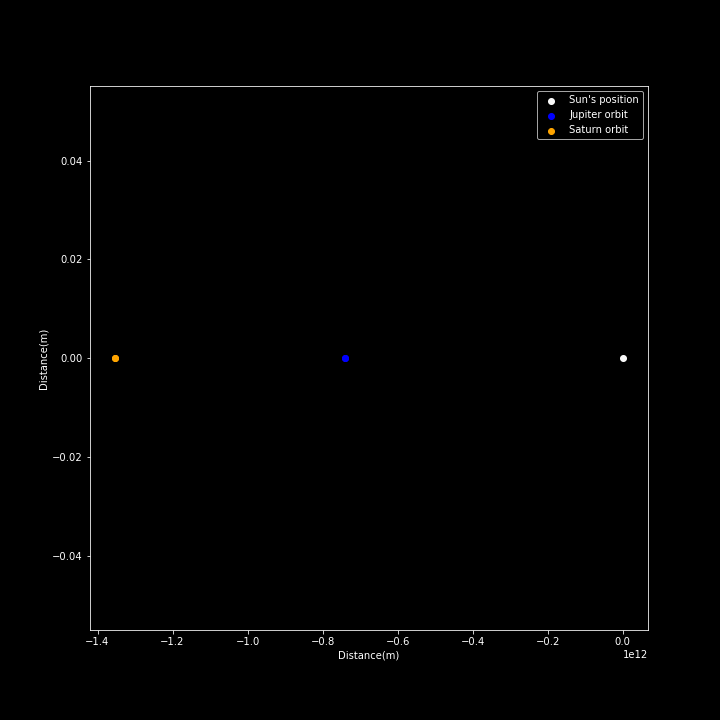

In [3]:
#Opens and displays the animation of task 1
with open('SunJupSat.gif','rb') as file:
    display(Image(file.read()))

# Task 2


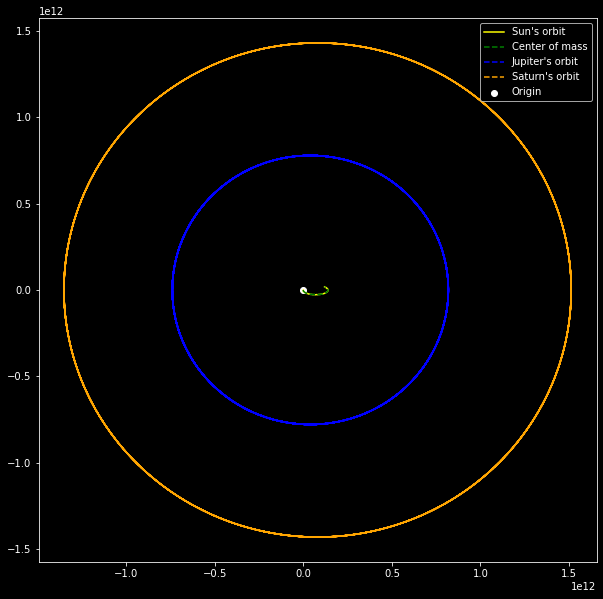

In [4]:
#Task 2  
#Resetting Jupiter's Initial Conditions:
X1=Jupiter['Xjup']              #Set initial X-Position value for Jupiter  (m)
Y1=Jupiter['Yjup']              #Set initial Y-Position value for Jupiter  (m)
Vxj=Jupiter['Vx_jup']           #Set initial X-Velocity for Jupiter        (m/day)
Vyj=Jupiter['Vy_jup']           #Set initial Y-Velocity for Jupiter        (m/day)
rjx=Sun['Xsun']-Jupiter['Xjup'] #Set initial distance between X-Coordinates of Jupiter and the Sun  (m)
rjy=Sun['Ysun']-Jupiter['Yjup'] #Set initial distance between Y-Coordinates of Jupiter and the Sun  (m)

#Resseting Saturn's Initial Conditions:
X2=Saturn['Xsat']               #Set initial X-Position for Saturn         (m)
Y2=Saturn['Ysat']               #Set initial Y-Position for Saturn         (m)
Vxs=Saturn['Vx_sat']            #Set initial X-velocity for Saturn         (m/day)
Vys=Saturn['Vy_sat']            #Set initial Y-velocity for Saturn         (m/day)
rsx=Sun['Xsun']-Saturn['Xsat']  #Set initial distance between x-coordinate of Saturn and the Sun    (m)
rsy=Sun['Ysun']-Saturn['Ysat']  #Set initial distance between y-coordinate of Saturn and the Sun    (m)

#Constants for the attraction forces
F_sunj=G*(Jupiter['Mjup'])      #Attraction force constant on the Sun from Jupiter    (#m^3day^-2)
F_suns=G*(Saturn['Msat'])       #Attraction force constant on the Sun from Saturn    (#m^3day^-2)

#Sun's Initial Conditions:
rsunjx=Jupiter['Xjup']-Sun['Xsun']  #Distance between the Jupiter's and Sun's corresponding X coordinates     (m)
rsunjy=Jupiter['Yjup']-Sun['Ysun']  #Distance between the Jupiter's and Sun's corresponding Y coordinates     (m)
rsunsx=Saturn['Xsat']-Sun['Xsun']   #Distance between the Saturn's and Sun's corresponding X coordinates      (m)
rsunsy=Saturn['Ysat']-Sun['Ysun']   #Distance between the Saturn's and Sun's corresponding Y coordinates      (m)
Vx_sun=Sun['Vx_sun']                #Set initial X-velocity for the Sun        (m/day)
Vy_sun=Sun['Vy_sun']                #Set initial Y-velocity for the Sun        (m/day)
X3=Sun['Xsun']                      #Set initial X-Position for the Sun        (m)
Y3=Sun['Ysun']                      #Set initial Y-Position for the Sun        (m)

#Initial List Values:
XJupiter=[Jupiter['Xjup']]      #Set initial X-Coordinate for Jupiter
YJupiter=[Jupiter['Yjup']]      #Set initial Y-Coordinate for Jupiter
XSaturn=[Saturn['Xsat']]        #Set initial X-Coordinate for Saturn           
YSaturn=[Saturn['Ysat']]        #Set initial Y-Coordinate for Saturn
XSun=[Sun['Xsun']]              #Set initial X-Coordinate for the Sun
YSun=[Sun['Ysun']]              #Set initial Y-Coordinate for the Sun

#Centre of Mass' Initial Conditions:
M_Total=Jupiter['Mjup']+Saturn['Msat']+Sun['Msun']   #Total mass of Jupiter, Saturn & the Sun
#Initial X & Y values of the Centre of mass
Center_Massx = ((Jupiter['Mjup'] * X1)+(Saturn['Msat'] * X2)+(Sun['Msun'] * X3))/M_Total  
Center_Massy = ((Jupiter['Mjup'] * Y1)+(Saturn['Msat'] * Y2)+(Sun['Msun'] * Y3))/M_Total 
CM_x, CM_y=[Center_Massx],[Center_Massy]             #Appends the X&Y Coordinates of the Centre of mass to lists

#For loop to calculate X and Y Coordinates for Jupiter & Saturn and for the Sun and Centre of mass
for i in T:
    Rj=(rjx**2+rjy**2)**0.5           #Distance between corresponding x and y values of the Sun to Jupiter
    Rs=(rsx**2+rsy**2)**0.5           #Distance between corresponding x and y values of the Sun to Saturn
    rsunjx_const=Jupiter['Xjup']-X3   #Distance between corresponding x values of the Sun to initial Jupiter position
    rsunjy_const=Jupiter['Yjup']-Y3   #Distance between corresponding y values of the Sun to initial Jupiter position
    rsunsx_const=Saturn['Xsat']-X3    #Distance between corresponding x values of the Sun to initial Saturn position
    rsunsy_const=Saturn['Ysat']-Y3    #Distance between corresponding y values of the Sun to initial Saturn position
    Rj_sun=(rsunjx_const**2+rsunjy_const**2)**0.5 #Distance between corresponding x and y values of the Jupiter to the Sun
    Rs_sun=(rsunsx_const**2+rsunsy_const**2)**0.5 #Distance between corresponding x and y values of the Saturn to the Sun
    
    #Jupiter
    ajx=Fj*rjx/(Rj**3)          #Acceleration for Jupiter's corresponding X position   (m/day^2)
    ajy=Fj*rjy/(Rj**3)          #Acceleration for Jupiter's corresponding Y position   (m/day^2)
    Vxj=Vxj+ajx                 #Velocity for Jupiter's corresponding X position       (m/day)
    Vyj=Vyj+ajy                 #Velocity for Jupiter's corresponding Y position       (m/day)
    
    X1=X1+Vxj                   #X Coordinate for Jupiter                              (m)
    XJupiter.append(X1)         #Appends the X Coordinate of Jupiter to a list
    Y1=Y1+Vyj                   #Y Coordinate for Jupiter                              (m)
    YJupiter.append(Y1)         #Appends the Y Coordinate of Jupiter to a list
    
    rjx=Sun['Xsun']-X1          #Distance between the Sun's and Jupiter's corresponding X coordinates
    rjy=Sun['Ysun']-Y1          #Distance between the Sun's and Jupiter's corresponding Y coordinates
    
    #Saturn
    asx=Fs*rsx/(Rs**3)          #Acceleration for Saturn's corresponding X position    (m/day^2)
    asy=Fs*rsy/(Rs**3)          #Acceleration for Saturn's corresponding Y position    (m/day^2)
    Vxs=Vxs+asx                 #Velocity for Saturn's corresponding X position        (m/day) 
    Vys=Vys+asy                 #Velocity for Saturn's corresponding Y position        (m/day)
   
    X2=X2+Vxs                   #X-coordinate for Saturn                               (m)
    XSaturn.append(X2)          #Appends the X Coordinate of Jupiter to a list
    Y2=Y2+Vys                   #Y-coordinate for Saturn                               (m)
    YSaturn.append(Y2)          #Appends the Y Coordinate of Jupiter to a list
    
    rsx=Sun['Xsun']-X2          #Distance between the Sun's and Saturn's corresponding X coordinates      (m)
    rsy=Sun['Ysun']-Y2          #Distance between the Sun's and Saturn's corresponding Y coordinates      (m)

    #Sun
    ax_sun=F_sunj*rsunjx/(Rj_sun**3)+F_suns*rsunsx/(Rs_sun**3)   #Acceleration for the Sun's X posistion  (m/day^2)
    ay_sun=F_sunj*rsunjy/(Rj_sun**3)+F_suns*rsunsy/(Rs_sun**3)   #Acceleration for the Sun's Y posistion  (m/day^2)
    Vx_sun=Vx_sun+ax_sun        #Velocity for the Sun's X posistion                                       (m/day)
    Vy_sun=Vy_sun+ay_sun        #Velocity for the Sun's Y posistion                                       (m/day)
   
    X3=X3+Vx_sun                #X-coordinate for the Sun                                                 (m)
    XSun.append(X3)             #Appends the X Coordinate of the Sun to a list
    Y3=Y3+Vy_sun                #Y-coordinate for the Sun                                                 (m)
    YSun.append(Y3)             #Appends the Y Coordinate of the Sun to a list
    
    rsunjx=X1-X3                #Distance between the Jupiter's and Sun's corresponding X coordinates     (m)
    rsunjy=Y1-Y3                #Distance between the Jupiter's and Sun's corresponding Y coordinates     (m)
    rsunsx=X2-X3                #Distance between the Saturn's and Sun's and corresponding X coordinates  (m)
    rsunxy=Y2-Y3                #Distance between the Saturn's and Sun's and corresponding Y coordinates  (m)
    
    #Creates X and Y Coordinates for the Centre of mass
    Center_Massx = ((Jupiter['Mjup'] * X1)+(Saturn['Msat'] * X2)+(Sun['Msun'] * X3))/M_Total
    Center_Massy = ((Jupiter['Mjup'] * Y1)+(Saturn['Msat'] * Y2)+(Sun['Msun'] * Y3))/M_Total
    CM_x.append(Center_Massx)   #Appends the X Coordinate of the Centre of mass to a list
    CM_y.append(Center_Massy)   #Appends the Y Coordinate of the Centre of mass to a list
    
#Code for the graph
plt.style.use('dark_background')                                          #Plots a black background for the plot
#Readjusts graph to be symmetrical
f = plt.figure()
f.set_figheight(10) 
f.set_figwidth(10)
plt.plot(XSun,YSun,'-', label=("Sun's orbit"), color=('yellow'))          #Plotting X and Y coordinates for the Sun
plt.plot(CM_x,CM_y,'--', label=("Center of mass"), color=('green'))       #Plotting X and Y coordinates for the Centre of Masses
plt.scatter(Sun['Xsun'],Sun['Xsun'], label=('Origin'), color=('white'))   #Plots the Origin
plt.plot(XJupiter,YJupiter,'--',label=("Jupiter's orbit"), color=('blue'))#Plotting X and Y coordinates of Jupiter
plt.plot(XSaturn,YSaturn,'--',label=("Saturn's orbit"), color=('orange')) #Plotting X and Y coordinates of Saturn
plt.legend(loc='upper right')                                             #Sets legend to top right of the graph
plt.show()

fig, ax = plt.subplots()  #Creates subplots
#Readjusts graph to be symmetrical
fig.set_figheight(10) 
fig.set_figwidth(10)
x1,y1,x2,y2,x3,y3,x4,y4=[],[],[],[],[],[],[],[]  #Creates blank lists

#Function for animating the graph
def animate(i, x1:list, y1:list):
    j=i*365                  #Set to every 365th element
    x1.append((XSun[j]))     #Appends the corresponding element to a list
    y1.append((YSun[j]))     #Appends the corresponding element to a list
    x2.append((CM_x[j]))     #Appends the corresponding element to a list
    y2.append((CM_y[j]))     #Appends the corresponding element to a list
    x3.append((XJupiter[j])) #Appends the corresponding element to a list
    y3.append((YJupiter[j])) #Appends the corresponding element to a list
    x4.append((XSaturn[j]))  #Appends the corresponding element to a list
    y4.append((YSaturn[j]))  #Appends the corresponding element to a list
    ax.clear()               #Clears the graph
    
    ax.plot(x1,y1,'-', label=("Sun's orbit"), color=('yellow'))          #Plotting X and Y coordinates for the Sun
    ax.plot(x1,y2,'--', label=("Center of mass"), color=('green'))       #Plotting X and Y coordinates for the Centre of Masses
    ax.scatter(0,0, label=('Origin'), color=('white'))                   #Plots the Origin
    ax.scatter(x3,y3,label=("Jupiter's orbit"), color=('blue'))        #Plotting X and Y coordinates of Jupiter
    ax.scatter(x4,y4,label=("Saturn's orbit"), color=('orange'))       #Plotting X and Y coordinates of Saturn
    ax.set_xlabel('Distance(m)')                                         #Displays the X label
    ax.set_ylabel('Distance(m)')                                         #Displays the Y label
    ax.legend(loc='upper right')                                         #Sets legend to top right of the graph
    
#Creating the animation for the graph 
ani = animation.FuncAnimation(fig, animate,fargs=(x1,y1), interval=1, save_count=250)
plt.close(ani._fig)                                                      #Closes the plot
ani.save('SunForce.gif', writer='pillow')                                #Saves animation in a gif file

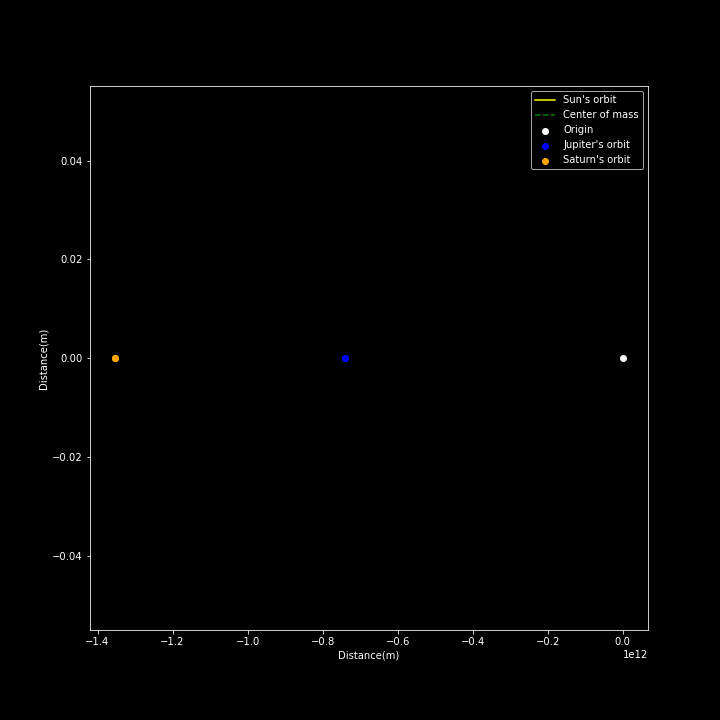

In [5]:
#Opens and displays the animation of task 2
with open('SunForce.gif','rb') as file:
    display(Image(file.read()))

# Task 3

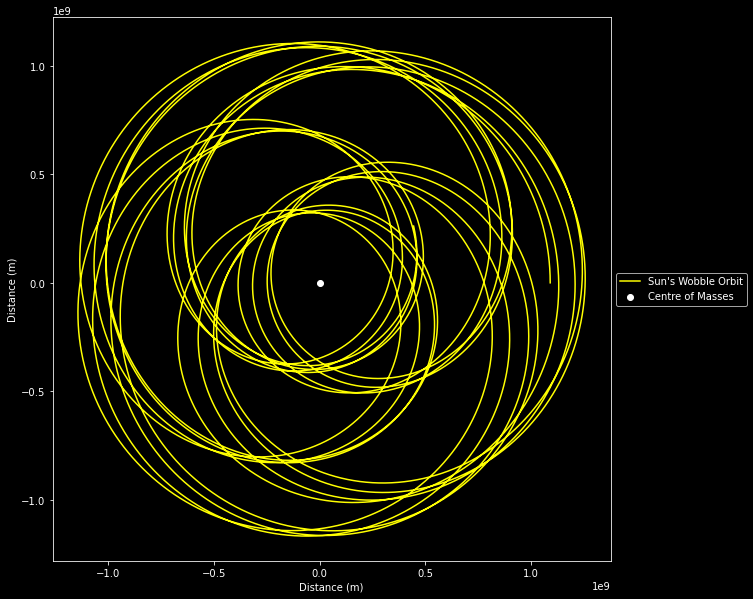

In [6]:
Rx_sun_centre=np.array(XSun)-np.array(CM_x)   #Difference of the corresponding X values of the Sun and the Centre of mass
Ry_sun_centre=np.array(YSun)-np.array(CM_y)   #Difference of the corresponding Y values of the Sun and the Centre of mass

#Readjusts graph to be symmetrical
f = plt.figure()
f.set_figheight(10) 
f.set_figwidth(10)
#Plots the Sun's Wobble Orbit
plt.plot(Rx_sun_centre, Ry_sun_centre, color = 'yellow', label = "Sun's Wobble Orbit") 
plt.scatter(0, 0, label = "Centre of Masses", color = 'white')  #Plotting the Centre of Masses
plt.xlabel('Distance (m)')                                      #Displays the X label
plt.ylabel('Distance (m)')                                      #Displays the Y label
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))          #Sets the legend outside of the graph
plt.show()

fig, ax = plt.subplots()     #Creates subplots
x1,y1=[],[]                  #Set blank lists
#Readjusts graph to be symmetrical
fig.set_figheight(10) 
fig.set_figwidth(10)
#Function for animating the graph
def animate(i, x1:list, y1:list):
    j=i*365                       #Set to every 365th element
    x1.append((Rx_sun_centre[j])) #Appends the corresponding element to a list
    y1.append((Ry_sun_centre[j])) #Appends the corresponding element to a list
    ax.clear()                    #Clears plot
    
    ax.scatter(Sun['Xsun'],Sun['Ysun'], label=("Origin"), color=('white')) #Plotting X and Y Coordinate for the Sun
    ax.plot(x1,y1,'-',label=("Sun's Wobble Orbit"), color=('Yellow'))     #Plotting X and Y Coordinates of Jupiter                    #Plotting X and Y Coordinates of Saturn
    ax.set_xlabel('Distance(m)')                                           #Displays the X label
    ax.set_ylabel('Distance(m)')                                           #Displays the Y label
    ax.legend(loc = 'upper right')                                         #Sets legend to top right of the graph
    
#Creating the animation for the graph    
ani = animation.FuncAnimation(fig, animate,fargs=(x1,y1), interval=1, save_count=250)
plt.close(ani._fig)                                                        #Closes the plot
ani.save('SunWobble.gif', writer='pillow')                                 #Saves animation in a gif file

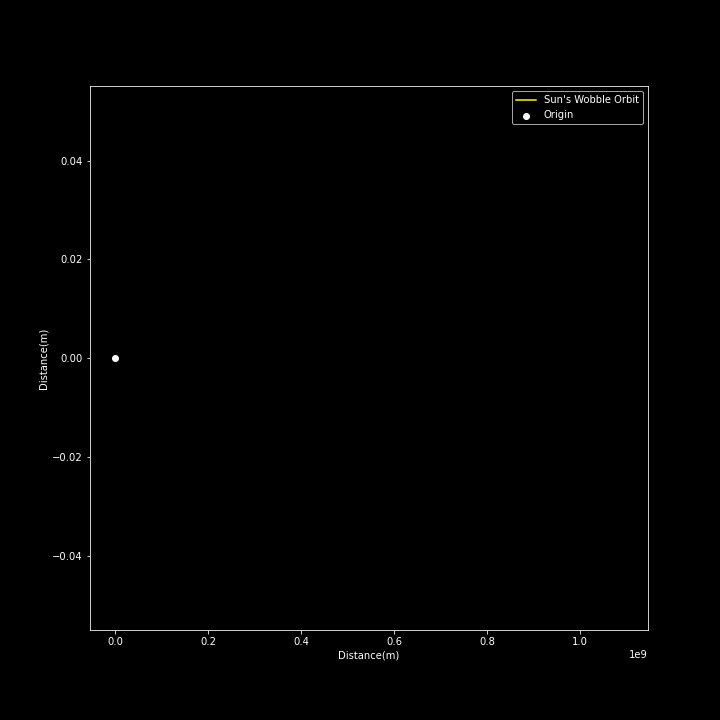

In [7]:
#Opens and displays the animation of task 3
with open('SunWobble.gif','rb') as file:
    display(Image(file.read()))

Task 1 is showing a graph of Jupiter and Saturn Orbiting around a fixed Sun position at (0,0) using the attraction force.
This is shown by the graph and gif for task 1.

Task 2 is showing a graph of Jupiter and Saturn orbiting around a fixed Sun position at (0,0) using the attraction force &
showing the Sun's wobble by using the attraction force on the Sun
This is shown in task 2 as a graph and gif

For Task 3 the goal was to the Sun's wobble around the Center of the mass.
This is shown using a 2d-graph and gif